In [1]:
#import 'math' library for mathematical operations
import math

#import 'random' library which is used to generate random numbers
import random

#import 'matplotlib' to create graphs and plots
import matplotlib.pyplot as plt

In [2]:
# import 'Counter' class from 'Collection' library which is used to count the 
#occurrences of items in a collection,which will be used to create a histogram.

from collections import Counter

In [3]:
'''Define a function normal_cdf that calculates the cumulative distribution function (CDF) of a normal distribution. 
It takes three parameters: x (the value for which you want to calculate the CDF), 
mu (the mean of the distribution, with a default value of 0), 
and sigma (the standard deviation of the distribution, with a default value of 1).'''


def normal_cdf(x,mu=0,sigma=1):
    return(1+math.erf((x-mu)/math.sqrt(2)))/2

In [4]:
'''defines a function inverse_normal_cdf that calculates the inverse of the CDF.
It takes four parameters: p (the probability for which you want to find the corresponding value),
mu (mean), sigma (standard deviation), and tolerance (a small value to control the precision of the result).
python'''

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    #initialize lower and upper bounds and their corresponding CDF values, low_p and hi_p.
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

In [5]:
'''Define a function called random_normal which will be used to generate random numbers
from a standard normal distribution (mean=0, standard deviation=1).'''


def random_normal():
    return inverse_normal_cdf(random.random())

In [6]:
xs=[random_normal() for _ in range(10000)]

ys1=[x+random_normal()/2 for x in xs]

ys2=[-x+random_normal()/2 for x in xs]

## Plotting the scatter plot

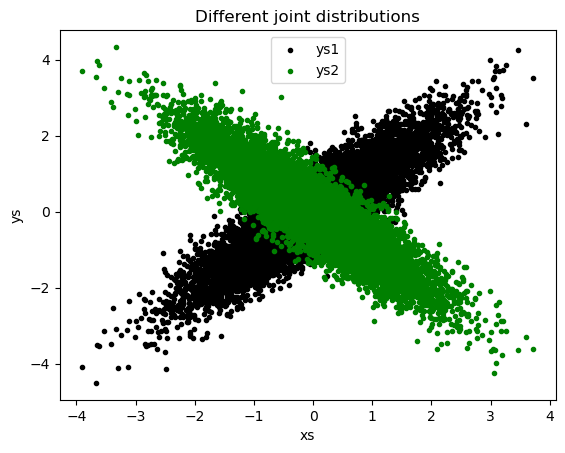

In [7]:
plt.scatter(xs,ys1,marker='.',color='black',label='ys1')
plt.scatter(xs,ys2,marker='.',color='green',label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title('Different joint distributions')
plt.show()